### Task 1 - Exploratory Data Analysis (EDA)

In [1]:
! pip install kaggle

### Mounting google drive




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the datasets

In [4]:
filepath = '/content/drive/MyDrive/Kaggle File/articles.csv'
articles = pd.read_csv(filepath)

In [5]:
filepath = '/content/drive/MyDrive/Kaggle File/customers.csv'
customers = pd.read_csv(filepath)

In [6]:
filepath = '/content/drive/MyDrive/Kaggle File/transactions_train.csv'
transactions = pd.read_csv(filepath)

### Looking at the datasets

In [7]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [8]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [9]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


### Checking the shape of the datasets

In [10]:
print(f'The shape of articles is {articles.shape}')
print(f'The shape of customers is {customers.shape}')
print(f'The shape of transactions is {transactions.shape}')

The shape of articles is (105542, 25)
The shape of customers is (1371980, 7)
The shape of transactions is (31788324, 5)


### Checking the data info

In [11]:
print(f'The info of articles is {articles.info()}', end = '/n')
print(f'The info of customers is {customers.info()}', end = '/n')
print(f'The info of transactions is {transactions.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

The date column in transaction table is wrongly classified as object instead of date.

In [12]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


### Checking for duplicate Values

In [14]:
articles.duplicated().sum()

np.int64(0)

In [15]:
customers.duplicated().sum()

np.int64(0)

In [16]:
transactions.duplicated().sum()

np.int64(2974905)

Data shows duplicates in transactions table but Duplicate rows correspond to multiple purchases of the same item.

### Checking for missing values

In [17]:
articles.isnull().sum()

,0
article_id,0
product_code,0
prod_name,0
product_type_no,0
product_type_name,0
product_group_name,0
graphical_appearance_no,0
graphical_appearance_name,0
colour_group_code,0
colour_group_name,0


There are 416 missing values in detail_desc column

In [18]:
customers.isnull().sum()

,0
customer_id,0
FN,895050
Active,907576
club_member_status,6062
fashion_news_frequency,16011
age,15861
postal_code,0


There are many null values in the customer data. Will analyze that further

In [19]:
transactions.isnull().sum()

,0
t_dat,0
customer_id,0
article_id,0
price,0
sales_channel_id,0


There are no null values in the transactions data

In [20]:
transactions['sales_channel_id'].value_counts()

,count
sales_channel_id,
2,22379862
1,9408462


Offline store is represented with channel id 1.

Online store is represented with channel id 2.

### Treating the missing values

#### Treating the FN Column

In [21]:
# FN is if a customer gets Fashion News newsletter.
customers['FN'].value_counts()

,count
FN,
1.0,476930


FN column showed 895050 null values, which acutally are not null values just those customers who didnt get the Fashion News newsletter.

so we will fill those null values with 0, to represent that these customers didnt get the newsletter

In [22]:
customers['FN'].fillna(0, inplace = True)

In [23]:
customers['FN'].isnull().sum()

np.int64(0)

In [24]:
customers['FN'].value_counts()

,count
FN,
0.0,895050
1.0,476930


#### Treating the Active Column

In [25]:
# Active is if the customer is active for communication.
customers['Active'].value_counts()

,count
Active,
1.0,464404


Active column showed 907576 null values, which acutally are not null values just those customers who are not active.

so we will fill those null values with 0, to represent that these customers are not active.

In [26]:
customers['Active'].fillna(0,inplace=True)

In [27]:
customers['Active'].isnull().sum()

np.int64(0)

In [28]:
customers['Active'].value_counts()

,count
Active,
0.0,907576
1.0,464404


#### Treating the club_member_status column

In [29]:
customers['club_member_status'].value_counts()

,count
club_member_status,
ACTIVE,1272491
PRE-CREATE,92960
LEFT CLUB,467


In [30]:
customers[customers['club_member_status'].isnull()]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,0.0,0.0,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
844,00283eca790298966c821223d7f2a33cd9ec3502aee2b4...,0.0,0.0,NaN,NONE,NaN,cd12e98fcbbbcbcc3b032efa9c377e9ec9f8459ddefcbf...
853,00286e2aaf05a86e2e6f6dc2603f036905a1601e0ee003...,0.0,0.0,NaN,NONE,52.0,e867d8b871a7bfe9861140cb3135e7bc1af9d7d1d95ed0...
908,002b19e907d63540d9176baffba80242c94859a5e97b3f...,0.0,0.0,NaN,NONE,26.0,fef5ba03d82e9cc5648c6e9659d646602d5244cdf208b0...
940,002c85ad44c3cb34c3e2c9105716840c3dc3d4e689b19a...,0.0,0.0,NaN,NONE,29.0,3720901dc3124075bd079049586d71d5bdaff8ef7e4ec1...
...,...,...,...,...,...,...,...
1370268,ffacd36a89e6042179219ae960aa8e6d95db24978384b7...,0.0,0.0,NaN,NONE,23.0,06bf2de0036c0ae68883f1c31f3dcaf037acc997e893f7...
1370365,ffb1b4a7212f1ba70007e0522a4d8671805ca7ba061f73...,0.0,0.0,NaN,NONE,17.0,2c834e07de11cc8d871f169eb156822d9869f026001751...
1370368,ffb1f4591bd4b7ba4c3da6a172a5e25079370d06194d4a...,0.0,0.0,NaN,NONE,25.0,9d575c0b5100be18d0894d8a6380db7409c54a69d101b1...
1371434,ffe528076021fe882398934647ae6c15b1044c12c693c9...,0.0,0.0,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [31]:
pd.crosstab(customers['Active'], customers['club_member_status'])

club_member_status,ACTIVE,LEFT CLUB,PRE-CREATE
Active,,,
0.0,814039,464,87329
1.0,458452,3,5631


In [32]:
print(customers['Active'].unique())

[0. 1.]


In [33]:
customers.loc[customers['club_member_status'].isnull() & (customers['Active'] == 1.0), 'club_member_status'] = 'ACTIVE'
customers.loc[customers['club_member_status'].isnull() & (customers['Active'] == 0.0), 'club_member_status'] = 'LEFT CLUB'

In [34]:
customers['club_member_status'].value_counts()

,count
club_member_status,
ACTIVE,1272809
PRE-CREATE,92960
LEFT CLUB,6211


In [35]:
customers['club_member_status'].isnull().sum()

np.int64(0)

#### Treating the fashion_news_frequency column

In [36]:
customers['fashion_news_frequency'].value_counts()

,count
fashion_news_frequency,
NONE,877711
Regularly,477416
Monthly,842


In [37]:
pd.crosstab(customers['Active'], customers['fashion_news_frequency'])

fashion_news_frequency,Monthly,NONE,Regularly
Active,,,
0.0,44,877212,14310
1.0,798,499,463106


In [38]:
customers[customers['fashion_news_frequency'].isnull()].tail(30)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1369717,ff92eb74e129c81f699e512d5ae8817387b6ca29ae1d75...,0.0,0.0,ACTIVE,NaN,69.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1369729,ff935f44676837dcb67efd3075f97c70993e2e6ff5c47a...,0.0,0.0,LEFT CLUB,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1369864,ff9ab0c46d904486a9506d5956b11c6e7f9790e6fbdf49...,0.0,0.0,ACTIVE,NaN,40.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1369930,ff9dc4c4b13260e222c42615615d4c5bf292507e7f6747...,0.0,0.0,ACTIVE,NaN,23.0,54ffb4845490e9cac09bde1dcaa81b09f3ffb426c87812...
1370036,ffa2dcfef1659396b7de2f104df4c966263e03aea26afd...,0.0,0.0,ACTIVE,NaN,58.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1370055,ffa39b9dc8830b1e8136fd50782ef25da6d2eed21a8819...,0.0,0.0,ACTIVE,NaN,51.0,84859a870a32d4caf4cde5fafe0479edb273392b44d72b...
1370097,ffa5243992e7e9284f208d9c62e2e9e45d91f4aee66841...,0.0,0.0,ACTIVE,NaN,52.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1370121,ffa5fb1107e4f66c926e9fe8f56399aa418a7ff0ffe37c...,0.0,0.0,ACTIVE,NaN,25.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1370192,ffa9433cab78b93556e9eb40bd27a71290a41c4e34bd5c...,0.0,0.0,PRE-CREATE,NaN,19.0,bfc1530a1a3d30f9b3b4553143c143479bca8358ac3bc9...
1370221,ffaa960f39712c0668553b8527b2ed4f3a9cf6a25dd4cb...,0.0,0.0,ACTIVE,NaN,57.0,d6c4dc0da3eda965efcef2d68cc62502e29cbafa7dafe7...


In [39]:
customers.loc[customers['fashion_news_frequency'].isnull() & (customers['Active'] == 1.0), 'fashion_news_frequency'] = 'Regularly'
customers.loc[customers['fashion_news_frequency'].isnull() & (customers['Active'] == 0.0), 'fashion_news_frequency'] = 'NONE'

In [40]:
customers['fashion_news_frequency'].value_counts()

,count
fashion_news_frequency,
NONE,893721
Regularly,477417
Monthly,842


In [41]:
customers['fashion_news_frequency'].isnull().sum()

np.int64(0)

#### Treating the Age column

In [42]:
customers['age'].isnull().sum()

np.int64(15861)

In [43]:
customers['age'].value_counts()

,count
age,
21.0,67530
24.0,56124
20.0,55196
25.0,54989
23.0,54867
...,...
98.0,7
97.0,4
93.0,4


In [44]:
round(customers['age'].mean(),0)

np.float64(36.0)

In [45]:
customers['age'].median()

np.float64(32.0)

In [46]:
# The missing values in age column should be filled with median as it is robust to outliers
customers['age'].fillna(customers['age'].median(), inplace = True)

In [47]:
customers['age'].isnull().sum()

np.int64(0)

#### Treating the detail_desc column of articles data

In [48]:
articles[articles['detail_desc'].isnull()].head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1467,351332007,351332,Marshall Lace up Top,252,Sweater,Garment Upper body,1010018,Treatment,7,Grey,...,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,NaN
2644,420049002,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,13,Beige,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2645,420049003,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,23,Dark Yellow,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN


After analyzing the dataset, it was clear to fill the missing values of detail_desc column wrt to product_code

In [49]:
df = articles.copy()

In [50]:
df[['product_code','detail_desc']].drop_duplicates(inplace=True)

In [51]:
desc_map = df.set_index('product_code')['detail_desc'].to_dict()

df['detail_desc'] = df['product_code'].map(desc_map)

In [52]:
desc_map

{108775: 'Jersey top with narrow shoulder straps.',
 110065: 'Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.',
 111565: 'Semi shiny nylon stockings with a wide, reinforced trim at the top. Use with a suspender belt. 20 denier.',
 111586: 'Tights with built-in support to lift the bottom. Black in 30 denier and light amber in 15 denier.',
 111593: 'Semi shiny tights that shape the tummy, thighs and calves while also encouraging blood circulation in the legs. Elasticated waist.',
 111609: 'Opaque matt tights. 200 denier.',
 112679: 'Sweatshirt in soft organic cotton with a  press-stud on one shoulder (sizes 12-18 months and 18-24 months without a press-stud). Brushed inside.',
 114428: 'Two soft bandeau bras in soft jersey with side support and a silicone trim at the top.',
 116379: 'Fitted top in 

## Exploratory Data Analysis

#### Analyzing Monthly Purchase Trends

In [53]:
transactions['month'] = transactions['t_dat'].dt.to_period('M')

In [54]:
monthly_sales = transactions.groupby('month')['sales_channel_id'].count()

In [55]:
monthly_sales = transactions.groupby('month').size()

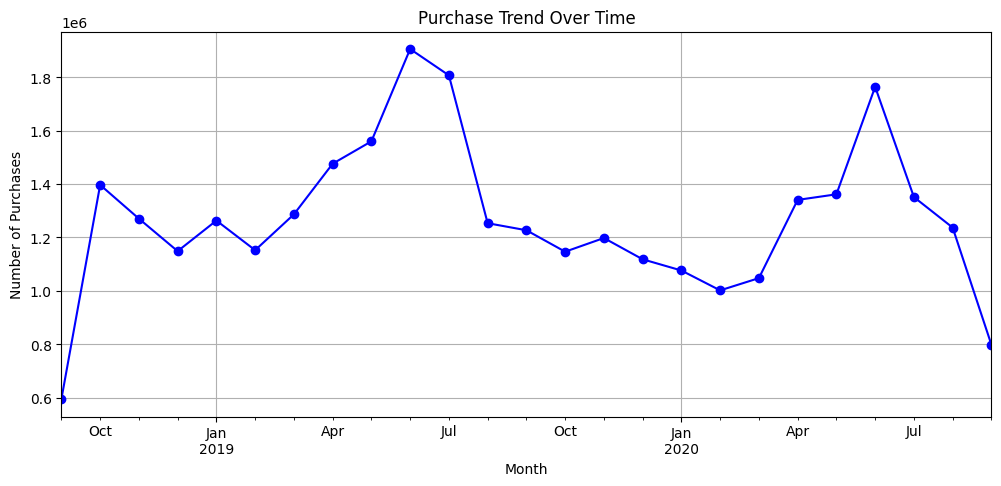

In [56]:
plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.title("Purchase Trend Over Time")
plt.grid(True)
plt.show()

Inferences :
1. Looking at the trend line it is clear that customers tends to purchase more in months like may and june probably because there are summer vacations.
2. Also the pruchases starts to see a decline as rainy and winter season approaches.
3. To increase sales in winters company can introduce new clothings.

#### Analyzing Sales of online and offline stores

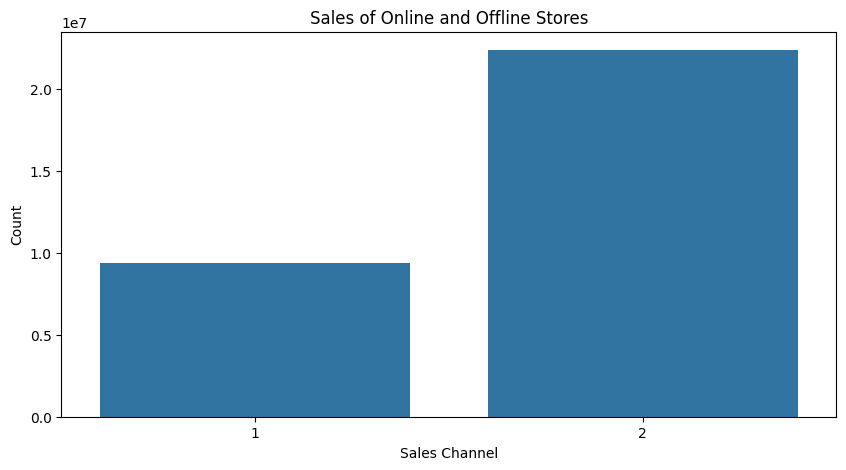

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x='sales_channel_id', data=transactions)
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.title("Sales of Online and Offline Stores")
plt.show()

In [58]:
# Barplot to analyze the sales among the stores

# plt.figure(figsize=(10,5))
# sns.barplot(x='sales_channel_id',y='price', data=transactions)
# plt.xlabel("Sales Channel")
# plt.ylabel("Amount")
# plt.title("Sales of Online and Offline Stores")
# plt.show()

In [59]:
# the above code was taking too long to run thus i used pivot table for my analysis

In [60]:
sales_summary = transactions.pivot_table(columns='sales_channel_id',values='price',aggfunc='sum')
sales_summary

sales_channel_id,1,2
price,215682.827915,668963.146136


Inferences:
1. Looking at the count plot, it is clear that the Online store sales are more than offline stores.
2. Looking at the total sales_summary table, it is clear that the Online store sales are more than offline stores.

Since the number of offline stores is not know, it might be the possiblity for the number to be low for offline stores also majority of people shop online this could also affect the numbers.

#### Analyzing the customers

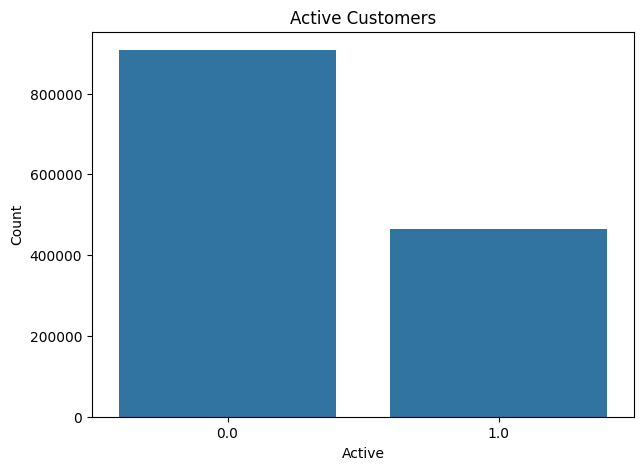

In [61]:
plt.figure(figsize=(7,5))
sns.countplot(x='Active', data=customers)
plt.xlabel("Active")
plt.ylabel("Count")
plt.title("Active Customers")
plt.show()

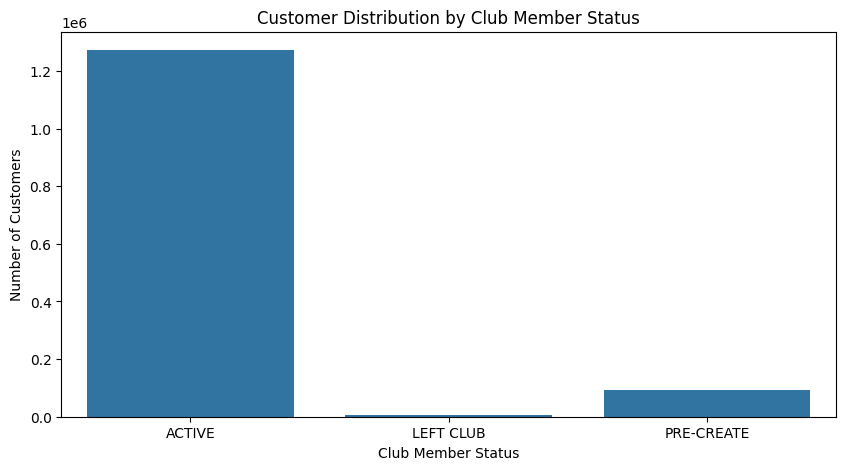

In [62]:
plt.figure(figsize=(10, 5))
sns.countplot(x='club_member_status', data=customers)
plt.xlabel("Club Member Status")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Club Member Status")
plt.show()

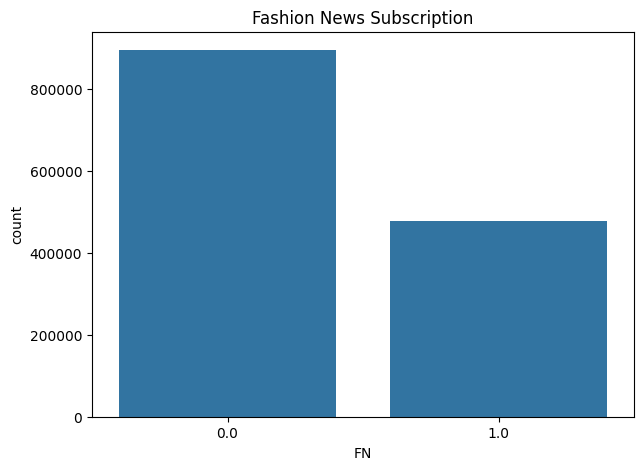

In [63]:
plt.figure(figsize=(7, 5))
sns.countplot(x=customers['FN'])
plt.title("Fashion News Subscription")
plt.show()

Inferences:
1. Looking at the countplot we can see that there is less number of customers who are Active.
2. The 2nd plot shows that approximately all active customers have club membership.
3. Since the number of nonactive and total of not subscribed customers of newsletter are almost same we can say that only active customers are getting Fashion News newsletter.

#### Analyzing customers and their transactions

In [64]:
data1 = pd.merge(transactions, customers, on='customer_id')
data1.head(1)

,t_dat,customer_id,article_id,price,sales_channel_id,month,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [66]:
data1.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'month', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency',
       'age', 'postal_code'],
      dtype='object')

In [77]:
data1.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,month,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


Customer Engagement: Correlation of purchases with FN (Fashion News subscription)
and Active status.

In [70]:
data1['FN'].corr(data1['Active'])

np.float64(0.9870340355486577)

In [72]:
customer_purchases = data1.groupby('customer_id').size().reset_index(name='num_purchases')

In [74]:
customer_info = data1[['customer_id', 'FN', 'Active']].drop_duplicates()

engagement_data1 = pd.merge(customer_purchases, customer_info, on='customer_id')

In [75]:
correlation = engagement_data1[['num_purchases', 'FN', 'Active']].corr()
print(correlation)

               num_purchases        FN    Active
num_purchases       1.000000  0.099500  0.103621
FN                  0.099500  1.000000  0.979907
Active              0.103621  0.979907  1.000000


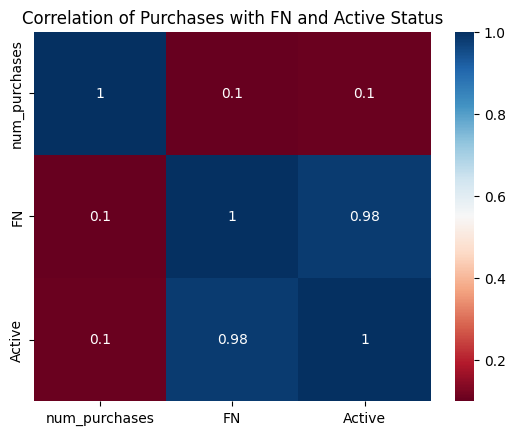

In [89]:
sns.heatmap(correlation, annot=True, cmap='RdBu')
plt.title("Correlation of Purchases with FN and Active Status")
plt.show()

Inferences:
1. There is a strong correlation between customers who are active and has subscribed to fashion newsletter.
2. There is a week correlation between number of purchases and whether a customer is active or not.

Popular Articles: Most bought items, categories, and trends over time.

In [81]:
data2 = pd.merge(transactions, articles, on='article_id')
data2.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id,month,product_code,prod_name,product_type_no,product_type_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09,663713,Atlanta Push Body Harlow,283,Underwear body,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09,541518,Rae Push (Melbourne) 2p,306,Bra,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."


In [82]:
data2.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'month', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

Popular Articles: Most bought items, clothing

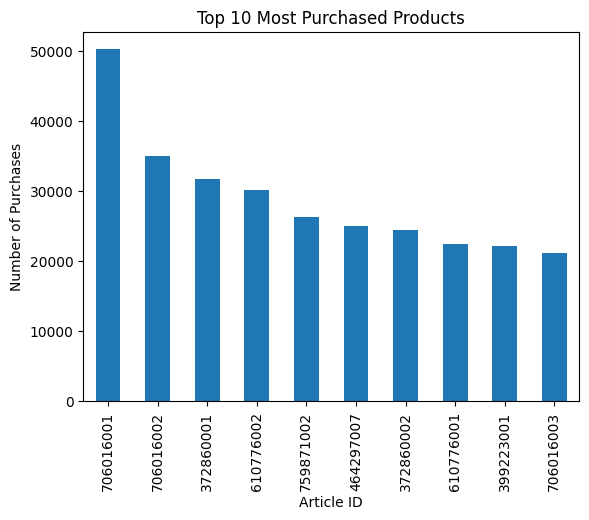

In [97]:
top_products = transactions["article_id"].value_counts().head(10).sort_values(ascending=False)
top_products.plot(kind='bar', title='Top 10 Most Purchased Products')
plt.xlabel("Article ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=90)
plt.show()

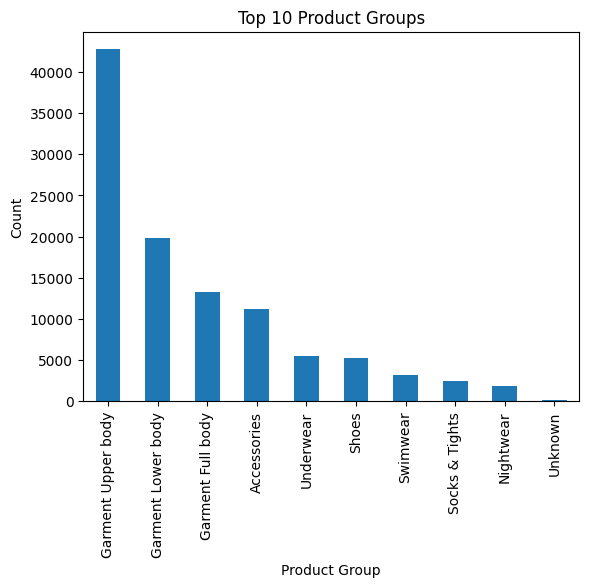

In [98]:
top_garments = articles["product_group_name"].value_counts().head(10).sort_values(ascending=False)
top_garments.plot(kind='bar', title='Top 10 Product Groups')
plt.xlabel("Product Group")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Inferences:
1. We can see the top 10 articles that's been purchsed out of which 706016001 is the most selling.
2. Looking at the clothings, almost all types are been purchase, but garments are the most popular.

#### Sales Trend over time

In [94]:
daily_sales= data2.groupby('t_dat')['price'].sum().reset_index()

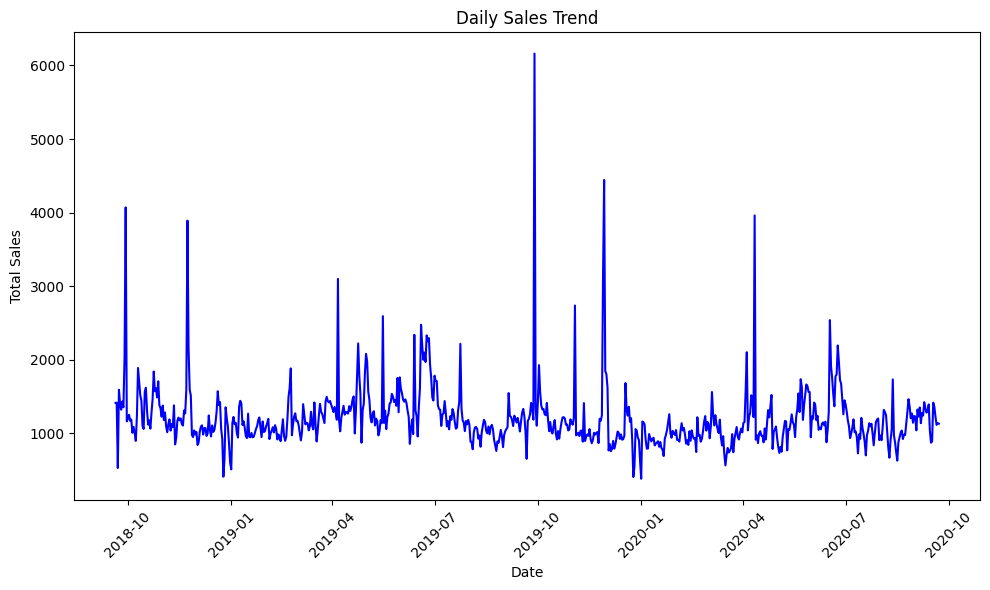

In [95]:
plt.figure(figsize=(10,6))
sns.lineplot(data=daily_sales, x='t_dat', y='price', color='blue')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Inferences:
1. We can see that there is a consistent sales with period though the sales increases in months when season changes or festivals comes.
2. Another major thing we can see that in 2019 the sale were over all low due to pandemic.

### Customer age distribution

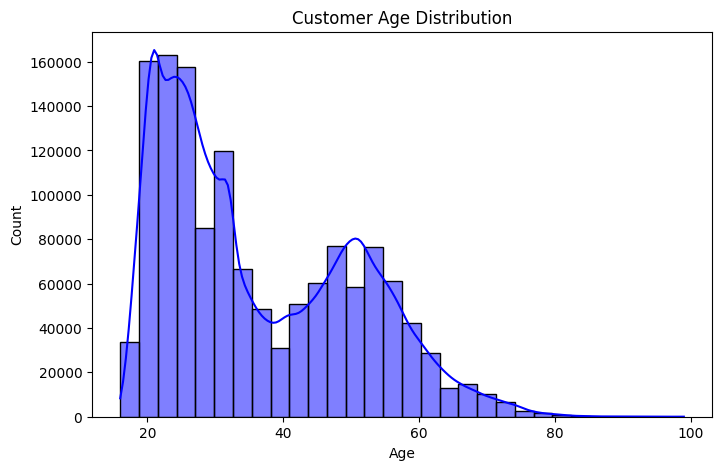

In [96]:
plt.figure(figsize=(8,5))
sns.histplot(customers["age"].dropna(), bins=30, kde=True, color="blue")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Inferences:
1. Majority of customers are young, between the age of 20 - 35
2.There's another noticeable bump around age 50–55 which shows customers from middle age are also buying the products.